<h1 style="text-align:center;">TF2202 Komputasi Rekayasa - Persamaan Diferensial Parsial</h1>
<h2 style="text-align:center;">Persamaan Adveksi</h2>
<h3 style="text-align:center;">Fadjar Fathurrahman</h3>

# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

In [4]:
import matplotlib
matplotlib.style.use("default")

In [12]:
import matplotlib.animation as animation

In [5]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [10]:
def create_anim_2d(y, x, t, ymin, ymax):
    plt.clf()
    fig, ax = plt.subplots()
    plt.ylim(ymin, ymax)
    k = 0
    line, = ax.plot(x, y[:,k])

    time_template = "t = %.5f"
    time_text = ax.text(0.8, 0.9, "", transform=ax.transAxes)

    def init():
        line.set_xdata(x)
        line.set_ydata(y[:,0])
        time_text.set_text(time_template % t[0])
        return line, time_text

    def animate(k):
        line.set_xdata(x)
        line.set_ydata(y[:,k])
        time_text.set_text(time_template % t[k])
        return line, time_text

    anim = animation.FuncAnimation(fig, animate, init_func=init, interval=len(t), blit=True,
                                   frames=len(t));
    return anim

# Persamaan adveksi (konveksi)

$$
\frac{\partial}{\partial t} u(x,t) + v \frac{\partial}{\partial x} u(x,t) = 0
$$

Domain:
- $0 \leq x \leq x_{f}$
- $0 \leq t \leq t_{f}$

Syarat batas (hanya pada bagian kiri):
- $u(0,t) = U_{0}$

Syarat awal:
- $u(x,0) = u^{0}(x)$

## Metode eksplisit

$$
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t} + v \frac{ u^{k}_{i+1} - u^{k}_{i-1} }{2\Delta x} = 0
$$

$$
u^{k+1}_{i} - u^{k}_{i} + v \frac{\Delta t}{2\Delta x} \left( u^{k}_{i+1} - u^{k}_{i-1} \right) = 0
$$

$$
u^{k+1}_{i} = u^{k}_{i} - \frac{1}{2} C \left( u^{k}_{i+1} - u^{k}_{i-1} \right)
$$

$$
C = v \frac{\Delta t}{\Delta x}
$$

### Implementasi

In [6]:
def advect_1d_exp(v, xf, tf, u0, bx0, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)
    
    # bilangan Courant
    C = v*dt/dx
    
    print("C = %f" % C)

    u = np.zeros( (Nx+1,Nt+1) )
    
    # Syarat awal
    for i in range(Nx+1):
        u[i,0] = u0( x[i] ) 
        
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
    
    for k in range(Nt):
        for i in range(1,Nx):
            u[i,k+1] = u[i,k] - 0.5*C*( u[i+1,k] - u[i-1,k] )
            #print("u = %d %d %18.10f" % (i, k+1, u[i,k+1]))
    
    return u, x, t

### Contoh

In [7]:
def u0(x):
    return np.exp( -150*(x-0.2)**2 )

def bx0(t):
    return 0.0

v = 1.0
xf = 1.0
tf = 0.2
Nx = 50
Nt = 1500

u, x, t = advect_1d_exp(v, xf, tf, u0, bx0, Nx, Nt )

C = 0.006667


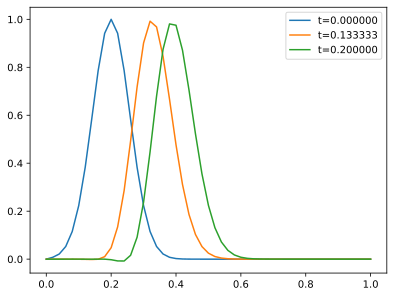

In [8]:
plt.clf()
for k in [0, 1000, -1]:
    plt.plot(x, u[:,k], label="t="+format("%f"%t[k]));
plt.legend()

<Figure size 640x480 with 0 Axes>

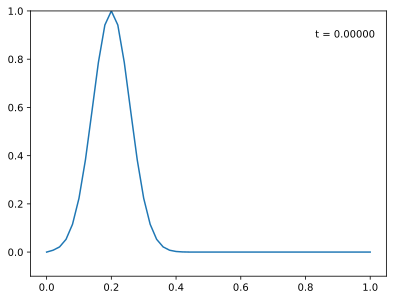

In [13]:
anim = create_anim_2d(u, x, t, -0.1, 1.0)

In [15]:
import IPython

In [16]:
IPython.display.HTML(anim.to_html5_video())

Metode ini tidak stabil. Error dari solusi numerik akan terus terakumulasi. Pada solusi diatas dapat kita lihat bahwa akan ada perubahan bentuk dari pulsa awal.

Berikut ini adalah contoh untuk kasus sampling waktu yang kita gunakan jauh lebih kecil.

In [ ]:
def u0(x):
    return np.exp( -150*(x-0.2)**2 )

def bx0(t):
    return 0.0

v = 1.0
xf = 1.0
tf = 0.2
Nx = 50
Nt = 50

u, x, t = advect_1d_exp(v, xf, tf, u0, bx0, Nx, Nt )

In [ ]:
plt.clf()
for k in [0, -1]:
    plt.plot(x, u[:,k], label="t="+format("%f"%t[k]));
plt.legend()

In [ ]:
anim = create_anim_2d(u, x, t, -0.05, 1.0)

In [ ]:
IPython.display.HTML(anim.to_html5_video())

## Metode Leapfrog

$$
\frac{u^{k+1}_{i} - u^{k-1}_{i}}{2\Delta t} + v \frac{u^{k}_{i+1} - u^{k}_{i-1}}{2\Delta x} = 0
$$

$$
u^{k+1}_{i} = u^{k-1}_{i} - C \left( u^{k}_{i+1} - u^{k}_{i-1} \right)
$$

Kondisi untuk stabilitas:

$$
C \leq 1
$$

atau

$$
\Delta t \leq \frac{\Delta x}{v}
$$

In [ ]:
def advect_1d_leapfrog(v, xf, tf, u0, bx0, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)
    
    # bilangan Courant
    C = v*dt/dx
    
    print("dt = ", dt)
    print("dx = ", dx)
    print("C = %f" % C)

    u = np.zeros( (Nx+1,Nt+1) )
    
    # Syarat awal
    for i in range(Nx+1):
        u[i,0] = u0( x[i] ) 
    
    for i in range(1,Nx):
        u[i,1] = u[i,0] + v*dt/dx*( u[i+1,0] - u[i,0] )
    
    for k in range(1,Nt):
        for i in range(1,Nx):
            u[i,k+1] = u[i,k-1] - C*( u[i+1,k] - u[i-1,k] )
    
    return u, x, t

### Contoh

In [ ]:
def u0(x):
    return np.exp( -150*(x-0.2)**2 )

def bx0(t):
    return 0.0

v = 1.0
xf = 1.0
tf = 0.4
Nx = 100
Nt = 1000

u, x, t = advect_1d_leapfrog(v, xf, tf, u0, bx0, Nx, Nt )

In [ ]:
plt.clf()
for k in [0, 1, 2, 4, -1]:
    plt.plot(x, u[:,k], label="t="+format("%.4f"%t[k]))
plt.legend();

In [ ]:
anim = create_anim_2d(u, x, t, -0.05, 1.0)

In [ ]:
IPython.display.HTML(anim.to_html5_video())

Metode leapfrog sudah lebih baik daripada metode eksplisit, namun solusi yang dihasilnya meninggalkan ripple.